In [60]:
from datetime import datetime
from enum import Enum

class Provider(Enum):
    YAHOO = "YAHOO"

class Data:

    def __repr__(self):
        kwargs = [f"{key}={value!r}" for key, value in self.__dict__.items() if key[0] != "_" or key[:2] != "__"]
        return "{}({})".format(type(self).__name__, "".join(kwargs))


class QuoteId(Data):
    def __init__(
            self,
            product_code: str = None,
            dt: datetime = None,
            provider: Provider = None
    ):
        self.product_code = product_code
        self.dt = dt
        self.provider = provider

    def __hash__(self):
        return hash((self.product_code, self.dt, self.provider))

    def __eq__(self, other):
        return self.__dict__ == other.__dict__ if isinstance(other, self.__class__) else False
    
    @classmethod
    def from_dict(cls,product_code:str, dt:datetime,provider:Provider):
        return cls(product_code,dt,provider)

class Quote(Data):
    def __init__(
            self,
            id: QuoteId = None,
            open: float = None,
            high: float = None,
            low: float = None,
            close: float = None
    ):
        self.id = id
        self.open = open
        self.high = high
        self.low = low
        self.close = close

    def __eq__(self, other):
        return self.id == other.id if isinstance(other, self.__class__) else False

    def __hash__(self):
        return hash(self.id)
    
    @classmethod
    def from_yahoo(cls,**kwargs):
        id = QuoteId.from_dict(
            product_code=kwargs.get("Product Code"),
            ts=kwargs.get("Date"),
            provider=Provider.Yahoo
        )
        
        return cls(id=id,open=kwargs.get("Open"),high=kwargs.get("High"),low=kwargs.get("Low"),close=kwargs.get("Close"))


class WeightId(Data):
    def __init__(self, strategy_code, underlying_code, dt: datetime):
        self.strategy_code = strategy_code
        self.underlying_code = underlying_code
        self.dt = dt

    def __hash__(self):
        return hash((self.strategy_code, self.underlying_code, self.dt))

    def __eq__(self, other):
        return self.__dict__ == other.__dict__ if isinstance(other, self.__class__) else False

    def __gt__(self, other):
        return self.dt > other.dt if isinstance(other, self.__class__) else False

    def __ge__(self, other):
        return self.dt >= other.dt if isinstance(other, self.__class__) else False

    def __lt__(self, other):
        return self.dt < other.dt if isinstance(other, self.__class__) else False

    def __le__(self, other):
        return self.dt <= other.dt if isinstance(other, self.__class__) else False


class Weight(Data):
    def __init__(self, id: WeightId, value: float):
        self.id = id
        self.value = value


    def __hash__(self):
        return hash((self.id))

    def __eq__(self, other):
        return self.__dict__ == other.__dict__ if isinstance(other, self.__class__) else False

    def __gt__(self, other):
        return self.id > other.id if isinstance(other, self.__class__) else False

    def __ge__(self, other):
        return self.id >= other.id if isinstance(other, self.__class__) else False

    def __lt__(self, other):
        return self.id < other.id if isinstance(other, self.__class__) else False

    def __le__(self, other):
        return self.id <= other.id if isinstance(other, self.__class__) else False

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('BTC-USD.csv',index_col="Date",parse_dates=True)

In [63]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075


In [64]:
data["Adj Close"]

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2022-01-27    37138.234375
2022-01-28    37784.332031
2022-01-29    38138.179688
2022-01-30    37917.601563
2022-01-31    38236.531250
Name: Adj Close, Length: 2694, dtype: float64

In [65]:
type(data["Adj Close"])

pandas.core.series.Series

<AxesSubplot:xlabel='Date'>

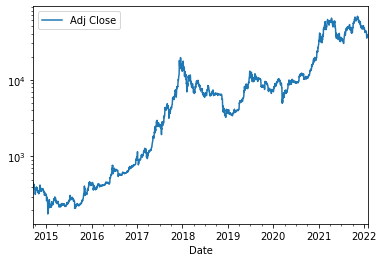

In [66]:
data["Adj Close"].plot(legend=True,logy=True)

In [67]:
data_dict = data.to_dict(orient='index')

In [68]:
data_dict

{Timestamp('2014-09-17 00:00:00'): {'Open': 465.864014,
  'High': 468.174011,
  'Low': 452.421997,
  'Close': 457.334015,
  'Adj Close': 457.334015,
  'Volume': 21056800},
 Timestamp('2014-09-18 00:00:00'): {'Open': 456.859985,
  'High': 456.859985,
  'Low': 413.104004,
  'Close': 424.440002,
  'Adj Close': 424.440002,
  'Volume': 34483200},
 Timestamp('2014-09-19 00:00:00'): {'Open': 424.102997,
  'High': 427.834991,
  'Low': 384.532013,
  'Close': 394.79599,
  'Adj Close': 394.79599,
  'Volume': 37919700},
 Timestamp('2014-09-20 00:00:00'): {'Open': 394.673004,
  'High': 423.29599,
  'Low': 389.882996,
  'Close': 408.903992,
  'Adj Close': 408.903992,
  'Volume': 36863600},
 Timestamp('2014-09-21 00:00:00'): {'Open': 408.084991,
  'High': 412.425995,
  'Low': 393.181,
  'Close': 398.821014,
  'Adj Close': 398.821014,
  'Volume': 26580100},
 Timestamp('2014-09-22 00:00:00'): {'Open': 399.100006,
  'High': 406.915985,
  'Low': 397.130005,
  'Close': 402.152008,
  'Adj Close': 402.15200

In [69]:
data_dict.get(pd.Timestamp('2014-09-17 00:00:00'))

{'Open': 465.864014,
 'High': 468.174011,
 'Low': 452.421997,
 'Close': 457.334015,
 'Adj Close': 457.334015,
 'Volume': 21056800}

In [56]:
quote_list = []
for ts,info in data_dict.items():
        id = QuoteId(product_code="BTC-USD",dt=ts,provider=Provider.YAHOO)
        quote = Quote(id=id,open=info.get('Open'),high=info.get('High'),low=info.get('Low'),close=info.get('Close'))
        quote_list.append(quote)

In [57]:
quote_list

[Quote(id=QuoteId(product_code='BTC-USD'dt=Timestamp('2014-09-17 00:00:00')provider=<Provider.YAHOO: 'YAHOO'>)open=465.864014high=468.174011low=452.421997close=457.334015),
 Quote(id=QuoteId(product_code='BTC-USD'dt=Timestamp('2014-09-18 00:00:00')provider=<Provider.YAHOO: 'YAHOO'>)open=456.859985high=456.859985low=413.104004close=424.440002),
 Quote(id=QuoteId(product_code='BTC-USD'dt=Timestamp('2014-09-19 00:00:00')provider=<Provider.YAHOO: 'YAHOO'>)open=424.102997high=427.834991low=384.532013close=394.79599),
 Quote(id=QuoteId(product_code='BTC-USD'dt=Timestamp('2014-09-20 00:00:00')provider=<Provider.YAHOO: 'YAHOO'>)open=394.673004high=423.29599low=389.882996close=408.903992),
 Quote(id=QuoteId(product_code='BTC-USD'dt=Timestamp('2014-09-21 00:00:00')provider=<Provider.YAHOO: 'YAHOO'>)open=408.084991high=412.425995low=393.181close=398.821014),
 Quote(id=QuoteId(product_code='BTC-USD'dt=Timestamp('2014-09-22 00:00:00')provider=<Provider.YAHOO: 'YAHOO'>)open=399.100006high=406.915985

In [58]:
type(quote_list[0])

__main__.Quote

In [70]:
data["Date"]=data.index

In [71]:
data["Product Code"]="BTC-USD"

In [72]:
data

,Open,High,Low,Close,Adj Close,Volume,Date,Product Code
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014-09-17,BTC-USD
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014-09-18,BTC-USD
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014-09-19,BTC-USD
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014-09-20,BTC-USD
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014-09-21,BTC-USD
...,...,...,...,...,...,...,...,...
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,2022-01-27,BTC-USD
2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,2022-01-28,BTC-USD
2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,2022-01-29,BTC-USD
